In [170]:
import numpy as np

def pagerank_original(adj_matrix, max_iterations=100, damping_factor=0.85, epsilon=1e-8):
    """
    Compute PageRank using the power iteration method.

    Parameters:
    - adj_matrix: The adjacency matrix representing the link structure of the web graph.
    - damping_factor: The probability of following a link (typically set to 0.85).
    - epsilon: Convergence threshold.
    - max_iterations: Maximum number of iterations.

    Returns:
    - A vector representing the PageRank scores for each node.
    """
    # Input validation
    if not isinstance(adj_matrix, np.ndarray) or adj_matrix.ndim != 2 or adj_matrix.shape[0] != adj_matrix.shape[1]:
        raise ValueError("Input must be a square numpy array representing the adjacency matrix of a graph.")

    n = len(adj_matrix)
    #print(n)

    # Initialize PageRank scores
    pagerank_scores = np.ones(n) / n
    print(f'Initial scores: {pagerank_scores}')

    # Initialize a vector to store the scores at each iteration
    scores_at_each_iteration = []

    for i in range(max_iterations):
        prev_pagerank_scores = pagerank_scores.copy()

        #print(f'Scores at iteration {i}: {pagerank_scores}')

        # Perform the power iteration
        pagerank_scores = ((1 - damping_factor) / n) + damping_factor * np.dot(adj_matrix, pagerank_scores)

        # Normalize the scores to [0, 1] 
        pagerank_scores = pagerank_scores / np.sum(pagerank_scores)
        #capture the scores at each iteration
        scores_at_each_iteration.append(pagerank_scores)

        # Check for convergence using the L1 norm
        if np.linalg.norm(pagerank_scores - prev_pagerank_scores, 1) < epsilon:
            print(f'Converged due to L1 norm < e at iteration {i}: \nL1 = {np.linalg.norm(pagerank_scores - prev_pagerank_scores, 1)}')
            break

    return pagerank_scores, scores_at_each_iteration
# end of pagerank_original

# sample adjacency matrices

#M = np.array([[0, 1, 1], 
#              [1, 0, 0], 
#              [1, 1, 0]])

M = np.array([
    [0, 1, 1, 1, 0],
    [0, 0, 1, 1, 0],
    [0, 0, 0, 1, 1],
    [1, 0, 0, 0, 1],
    [1, 1, 1, 0, 0]
])

print("Adjacency Matrix:\n", M, "\n")

# Transpose the matrix
MT = M.T
print("Transposed Adjacency Matrix:\n", MT, "\n")

normalized_scores, scores_at_each_iteration = pagerank_original(MT, 100)
print("Normalized PageRank Scores:", normalized_scores, "\n")



Adjacency Matrix:
 [[0 1 1 1 0]
 [0 0 1 1 0]
 [0 0 0 1 1]
 [1 0 0 0 1]
 [1 1 1 0 0]] 

Transposed Adjacency Matrix:
 [[0 0 0 1 1]
 [1 0 0 0 1]
 [1 1 0 0 1]
 [1 1 1 0 0]
 [0 0 1 1 0]] 

Initial scores: [0.2 0.2 0.2 0.2 0.2]
Converged due to L1 norm < e at iteration 36: 
L1 = 5.8491803067717285e-09
Normalized PageRank Scores: [0.18264054 0.16150761 0.22475457 0.23660565 0.19449162] 



<strong>Below block courtesy of NetworkX example documentation</strong>, via 'https://networkx.org/documentation/latest/auto_examples/drawing/plot_directed.html#sphx-glr-auto-examples-drawing-plot-directed-py'
<i>This code has been modified to suit the needs of this project.</i>


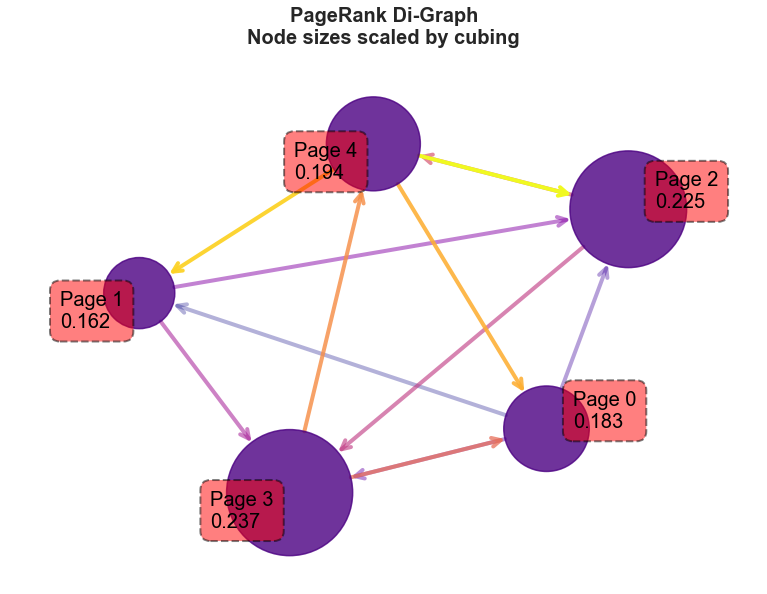

In [174]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import networkx as nx

plt.figure(figsize=(11, 8))  

seed = 4277
# copy the 
G = nx.DiGraph(M)
pos = nx.spring_layout(G, seed=seed)
#print(pos)

pos_node = pos.copy()
# Manually adjust the positions of the nodes to make them more readable
for key, value in pos.items():
    if (key == 1 or key == 3 or key == 4):
        pos_node[key] = (value[0] - 0.3, value[1] - 0.1)
    else:
        pos_node[key] = (value[0] + 0.1, value[1] + 0.1)


# exponential scaling of node sizes
node_sizes = [1.2 * (score*100)**3 for score in normalized_scores]
m = G.number_of_edges()
edge_colors = range(2, m + 2)
edge_alphas = [(5 + i) / (m + 4) for i in range(m)]
cmap = plt.cm.plasma

nodes = nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color="indigo", margins=0.2, alpha=0.8)
edges = nx.draw_networkx_edges(
    G,
    pos,
    node_size=node_sizes,
    arrowstyle="->",
    arrowsize=22,
    edge_color=edge_colors,
    edge_cmap=cmap,
    width=4,
)

normalized_scores_rounded = [round(score, 3) for score in normalized_scores]

# set node labels
labels = {}
for node in G.nodes():
    labels[node] = f'Page {node}\n{normalized_scores_rounded[node]}'

# draw node labels
node_labels = nx.draw_networkx_labels(G, pos=pos_node, labels=labels,  font_size=20, font_color="black", horizontalalignment="left", clip_on=False, bbox=dict(facecolor='red', boxstyle='round,pad=0.5', alpha=0.5, edgecolor='black', linewidth=2, linestyle='dashed'))

# set alpha value for each edge
for i in range(m):
    edges[i].set_alpha(edge_alphas[i])

pc = mpl.collections.PatchCollection(edges, cmap=cmap)
pc.set_array(edge_colors)

# set the size of the plot
plt.tight_layout()
ax = plt.gca()
ax.set_axis_off()
plt.title("PageRank Di-Graph\nNode sizes scaled by cubing", fontsize=20, fontweight="bold")
#plt.colorbar(pc, ax=ax)
plt.show()

<i>Time to graph implementation completion: 3 hours...</i>

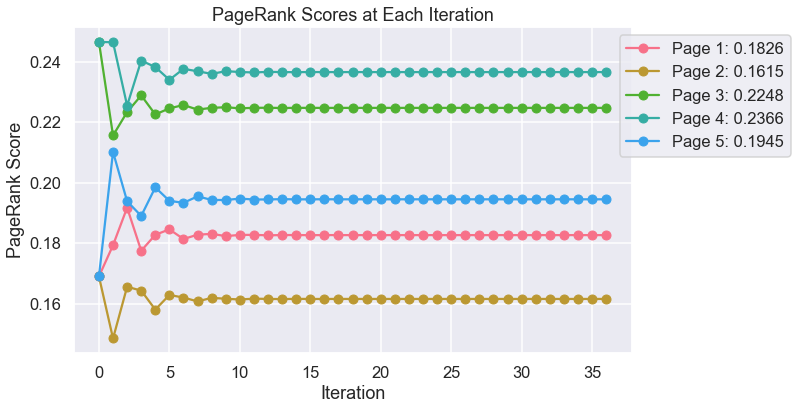

In [154]:

import seaborn as sns
import matplotlib.pyplot as plt

# Set style and context
sns.set_style("darkgrid")
sns.set_context("talk")
sns.set_palette("husl")

# Create a figure and axis
plt.figure(figsize=(10, 6))
ax = plt.subplot(1, 1, 1)


# Plot each page's score versus the iteration number
for i in range(len(normalized_scores)):
    page_scores_at_each_iteration = [scores[i] for scores in scores_at_each_iteration]
    ax.plot(range(len(page_scores_at_each_iteration)), page_scores_at_each_iteration, label=f'Page {i+1}: {np.round(normalized_scores[i],4)}', marker='o')

# Set labels and legend
ax.set_xlabel('Iteration')
ax.set_ylabel('PageRank Score')
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))


plt.title('PageRank Scores at Each Iteration')
plt.show()

In [ ]:
# wikipedia
import numpy as np

def pagerank(M, num_iterations: int = 100, d: float = 0.85):
    """PageRank algorithm with explicit number of iterations. Returns ranking of nodes (pages) in the adjacency matrix.

    Parameters
    ----------
    M : numpy array
        adjacency matrix where M_i,j represents the link from 'j' to 'i', such that for all 'j'
        sum(i, M_i,j) = 1
    num_iterations : int, optional
        number of iterations, by default 100
    d : float, optional
        damping factor, by default 0.85

    Returns
    -------
    numpy array
        a vector of ranks such that v_i is the i-th rank from [0, 1],
        v sums to 1

    """
    N = M.shape[1]
    v = np.ones(N) / N
    print(v)
    M_hat = (d * M + (1 - d) / N)
    for i in range(num_iterations):
        v = M_hat @ v
        print(v)
    return v

M = np.array([[0, 1, 1], [1, 0, 0], [1, 1, 0]])

v = pagerank(M, 100, 0.85)
print(v)